# [1] 결측치 처리

## (1) 결측치 확인

In [2]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [5]:
path = '/content/drive/MyDrive/새싹2기/python_DA/data/titanic.csv'

titan = pd.read_csv(path)

In [6]:
titan.isnull()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
887,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False
889,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [11]:
mv = titan.isnull().sum()
mv

,0
survived,0
pclass,0
sex,0
age,177
sibsp,0
parch,0
fare,0
embarked,2
class,0
who,0


<Axes: >

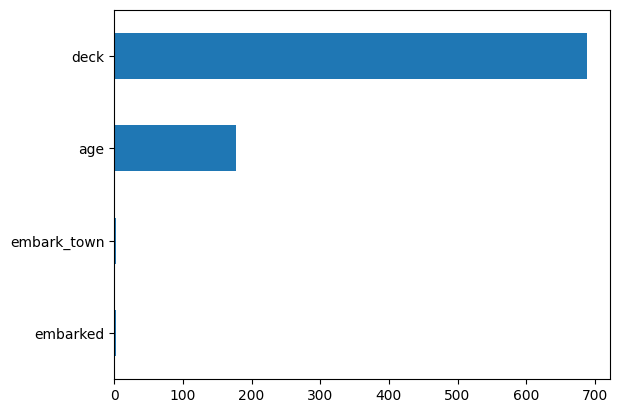

In [12]:
mv[mv > 0].sort_values().plot.barh()

## (2) 결측치 처리 전략

- 제거

In [13]:
cleaned1 = titan.dropna()
cleaned1.shape # 모든 행에서 어떤 하나만 결측이어도 삭제 700개 이상의 삭제

(182, 15)

In [17]:
# 결측치가 심한 열 삭제
cleaned2 = titan.dropna(axis=1)
cleaned2.shape  # 결측치가 있는 4개열 삭제됨

(891, 11)

In [21]:
# 특정 열에 대한 결측치가 있는 행 제거 (다중 조건)
cleaned3 = titan.drop(['deck'], axis=1).dropna(subset=['embarked','embark_town'])
cleaned3

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,Cherbourg,yes,True


- 대체
- fillna() => 기술통계량으로 대체

In [23]:
titan['age'].isnull().sum()

np.int64(177)

In [22]:
cleaned4 = titan.fillna(titan['age'].median())
cleaned4['age']

,age
0,22.0
1,38.0
2,26.0
3,35.0
4,35.0
...,...
886,27.0
887,19.0
888,28.0
889,26.0


## *결측치 처리 실습

In [33]:
path = ('/content/drive/MyDrive/새싹2기/python_DA/data/preprocess_tips.csv')
tip = pd.read_csv(path)

In [34]:
tip.shape

(244, 8)

In [36]:
tip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  244 non-null    int64  
 1   total_bill  244 non-null    float64
 2   tip         220 non-null    float64
 3   sex         220 non-null    object 
 4   smoker      244 non-null    object 
 5   day         244 non-null    object 
 6   time        244 non-null    object 
 7   size        244 non-null    int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 15.4+ KB


In [37]:
tip.head()

,Unnamed: 0,total_bill,tip,sex,smoker,day,time,size
0,53,9.94,1.56,Male,False,Sun,Dinner Dinner,2
1,148,9.78,NaN,Male,False,Thur,Lunch Lunch,2
2,43,9.68,1.32,NaN,False,Sun,Dinner Dinner,2
3,178,9.60,4.00,FEMALE,Yes,Sun,Dinner Dinner,2
4,30,9.55,1.45,Male,False,Sat,Dinner Dinner,2


In [41]:
tip.isnull().sum()

,0
Unnamed: 0,0
total_bill,0
tip,24
sex,24
smoker,0
day,0
time,0
size,0


In [48]:
# 1. 필요없는 열 제거
tips = tip.drop('Unnamed: 0', axis=1)
tips.head(0)

,total_bill,tip,sex,smoker,day,time,size


In [51]:
tips['tip'] = tips['tip'].fillna(0)
tips

,total_bill,tip,sex,smoker,day,time,size
0,9.94,1.56,Male,False,Sun,Dinner Dinner,2
1,9.78,0.00,Male,False,Thur,Lunch Lunch,2
2,9.68,1.32,NaN,False,Sun,Dinner Dinner,2
3,9.60,4.00,FEMALE,Yes,Sun,Dinner Dinner,2
4,9.55,1.45,Male,False,Sat,Dinner Dinner,2
...,...,...,...,...,...,...,...
239,10.29,2.60,FEMALE,False,Sun,Dinner Dinner,2
240,10.27,1.71,Male,False,Sun,Dinner Dinner,2
241,10.09,2.00,FEMALE,Yes,Fri,Lunch Lunch,2
242,10.07,1.83,FEMALE,False,Thur,Lunch Lunch,1


In [96]:
tips['tip'].describe()

,tip
count,244.000000
mean,2.734877
std,1.622814
min,0.000000
25%,1.927500
50%,2.555000
75%,3.502500
max,10.000000


In [100]:
tip['tip'].describe()

,tip
count,220.000000
mean,3.033227
std,1.418814
min,1.000000
25%,2.000000
50%,3.000000
75%,3.720000
max,10.000000


In [64]:
tips['sex'] =tips['sex'].fillna('Unknown')
tips

,total_bill,tip,sex,smoker,day,time,size
0,9.94,1.56,Male,False,Sun,Dinner Dinner,2
1,9.78,0.00,Male,False,Thur,Lunch Lunch,2
2,9.68,1.32,Unknown,False,Sun,Dinner Dinner,2
3,9.60,4.00,FEMALE,Yes,Sun,Dinner Dinner,2
4,9.55,1.45,Male,False,Sat,Dinner Dinner,2
...,...,...,...,...,...,...,...
239,10.29,2.60,FEMALE,False,Sun,Dinner Dinner,2
240,10.27,1.71,Male,False,Sun,Dinner Dinner,2
241,10.09,2.00,FEMALE,Yes,Fri,Lunch Lunch,2
242,10.07,1.83,FEMALE,False,Thur,Lunch Lunch,1


In [91]:
tips['sex'] = tips['sex'].str.lower()
tips['sex']

,sex
0,male
1,male
2,unknown
3,female
4,male
...,...
239,female
240,male
241,female
242,female


In [93]:
tips['smoker'].map({'Yes': True, 'False': False})

,smoker
0,False
1,False
2,False
3,True
4,False
...,...
239,False
240,False
241,True
242,False


In [95]:
tips['day'].head()

,day
0,Sun
1,Thur
2,Sun
3,Sun
4,Sat


In [102]:
tips['time'] = tips['time'].str.split().map(lambda x:x[0])
tips['time']

,time
0,Dinner
1,Lunch
2,Dinner
3,Dinner
4,Dinner
...,...
239,Dinner
240,Dinner
241,Lunch
242,Lunch


In [106]:
final = tips.rename({'sex':'gender'}, axis=1)
final.columns

Index(['total_bill', 'tip', 'gender', 'smoker', 'day', 'time', 'size'], dtype='object')

In [107]:
final['gender'].value_counts(normalize=True)

,proportion
gender,
male,0.590164
female,0.311475
unknown,0.098361


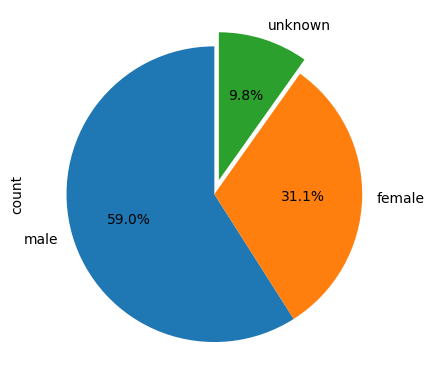

In [109]:
final['gender'].value_counts().plot.pie(autopct = '%1.1f%%', startangle= 90 ,
                                        labels = ['male','female','unknown'], explode = [0,0, 0.1]
                                        );

## *이상치 처리 실습

In [126]:
titan.shape

(891, 15)

In [116]:
# pclass 이상치 확인
titan.loc[(titan['pclass']> 3 )| (titan['pclass'] < 1)].count()

,0
survived,0
pclass,0
sex,0
age,0
sibsp,0
parch,0
fare,0
embarked,0
class,0
who,0


In [119]:
# survived 이상치 확인
titan.loc[~((titan['survived'] == 1) | (titan['survived'] == 0))]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone


- 사분위수로 이상치 점검

In [121]:
Q1 = titan['fare'].quantile(0.25)
Q3 = titan['fare'].quantile(0.75)
IQR = Q3 - Q1
IQR

np.float64(23.0896)

In [137]:
lower = Q1 - 1.5 * IQR
lower

np.float64(-26.724)

In [138]:
upper = Q3 + 1.5 * IQR
upper

np.float64(65.6344)

In [141]:
d = titan.loc[(titan['fare']<lower) | (titan['fare']> upper)]
titan['fare'].describe()

,fare
count,891.000000
mean,32.204208
std,49.693429
min,0.000000
25%,7.910400
50%,14.454200
75%,31.000000
max,512.329200


In [140]:
d['fare'].describe()

,fare
count,116.000000
mean,128.291629
std,84.636908
min,66.600000
25%,78.189600
50%,90.000000
75%,147.778100
max,512.329200


<Axes: >

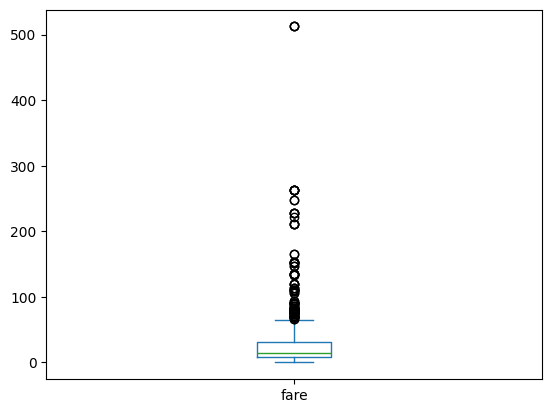

In [144]:
titan['fare'].plot.box()

<Axes: xlabel='pclass', ylabel='fare'>

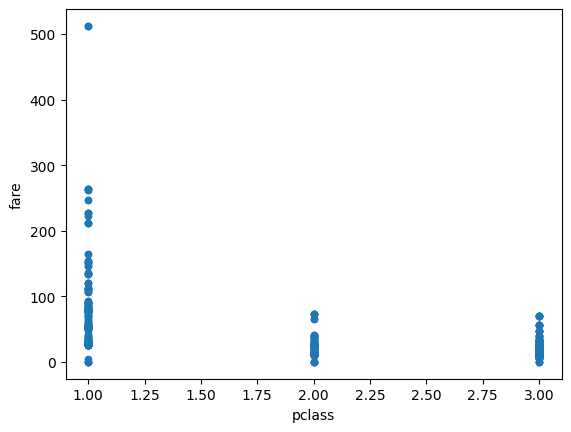

In [145]:
titan.plot.scatter(x = 'pclass', y='fare')

In [146]:
titan[titan['fare']>=500]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
258,1,1,female,35.0,0,0,512.3292,C,First,woman,False,NaN,Cherbourg,yes,True
679,1,1,male,36.0,0,1,512.3292,C,First,man,True,B,Cherbourg,yes,False
737,1,1,male,35.0,0,0,512.3292,C,First,man,True,B,Cherbourg,yes,True
